# FORECASTING COVID-19 CASES IN USA AT COUNTY LEVEL

  We were required to develop a tool for a US public health client to predict daily Covid-19 cases at a county level,
  using the provided dataset with information updated to January 2021. 

### IMPORTING ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORTING DATASET

   Since data is in form of CSV file we have to use pandas read_csv to load the data.
   
   After loading it is important to check the complete information of data as it can indicate many of the hidden infomation        such as null values in a column or a row.

In [2]:
df=pd.read_csv('/Users/satya/Downloads/EQ_2021_Data_Sample.csv')

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 82 columns):
 #   Column                                                                  Non-Null Count    Dtype  
---  ------                                                                  --------------    -----  
 0   countyFIPS                                                              1179375 non-null  int64  
 1   stateFIPS                                                               1179375 non-null  int64  
 2   date                                                                    1179375 non-null  object 
 3   confirmed_cases                                                         1179375 non-null  int64  
 4   deaths                                                                  1179375 non-null  int64  
 5   google_mobility_retail_and_recreation                                   566919 non-null   float64
 6   google_mobility_grocery_and_pharmacy                      

In [4]:
df.head(20)

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1011,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1013,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1015,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1017,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1019,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.tail(20)

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
1179355,56007,56,2021-01-30,1198,18,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179356,56009,56,2021-01-30,904,14,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179357,56011,56,2021-01-30,413,10,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179358,56013,56,2021-01-30,4435,77,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179359,56015,56,2021-01-30,1118,20,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179360,56017,56,2021-01-30,354,3,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179361,56019,56,2021-01-30,612,9,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179362,56021,56,2021-01-30,7984,87,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179363,56023,56,2021-01-30,1132,11,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179364,56025,56,2021-01-30,7470,117,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263


In [6]:
df.describe()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
count,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,566919.000000,512485.000000,196917.000000,318671.000000,836664.000000,456569.000000,...,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06
mean,3.035730e+04,3.026518e+01,2.016216e+03,4.852388e+01,-10.303391,0.584640,22.697456,-12.458790,-23.158080,7.895589,...,1.098786e+03,2.333414e+01,1.201366e+01,6.249557e-01,1.125452e+04,1.661977e+04,1.197940e-01,7.872846e-02,1.291507e-01,4.242515e-01
std,1.517704e+04,1.514963e+01,1.119552e+04,2.867077e+02,19.828237,15.212703,59.530412,26.229057,15.199087,6.011012,...,2.231530e+03,5.527166e+01,2.594898e+01,1.437939e-01,1.256925e+04,1.767744e+04,8.373358e-02,6.171769e-02,1.436028e-01,6.663241e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-100.000000,-96.000000,-95.000000,-93.000000,-92.000000,-46.000000,...,0.000000e+00,-1.200000e+01,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.817300e+04,1.800000e+01,4.000000e+00,0.000000e+00,-21.000000,-8.000000,-17.000000,-31.000000,-32.000000,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.746418e-01,2.879000e+03,4.948000e+03,6.339762e-02,3.786575e-02,0.000000e+00,0.000000e+00
50%,2.917300e+04,2.900000e+01,1.330000e+02,2.000000e+00,-9.000000,0.000000,9.000000,-10.000000,-23.000000,7.000000,...,2.610000e+02,4.000000e+00,1.000000e+00,6.517731e-01,7.432000e+03,1.136600e+04,9.945355e-02,6.154683e-02,9.843400e-02,6.058632e-01
75%,4.507900e+04,4.500000e+01,9.100000e+02,1.800000e+01,2.000000,8.000000,48.000000,5.000000,-14.000000,11.000000,...,1.098000e+03,2.400000e+01,1.200000e+01,7.126916e-01,1.377300e+04,2.045100e+04,1.699732e-01,1.116009e-01,2.268285e-01,7.427066e-01
max,5.604500e+04,5.600000e+01,1.078329e+06,1.633200e+04,261.000000,225.000000,709.000000,252.000000,66.000000,42.000000,...,2.191000e+04,1.318000e+03,4.470000e+02,1.228947e+00,5.747100e+04,1.046650e+05,1.220200e+00,1.000000e+00,1.073519e+00,5.849506e+01


In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 82 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   566919 non-null   float64       
 6   go

### Exploratory Data Analysis 
   To gain some useful insights about the data, such as finding number of missing and null values by performing univariate and      bivariate analysis.

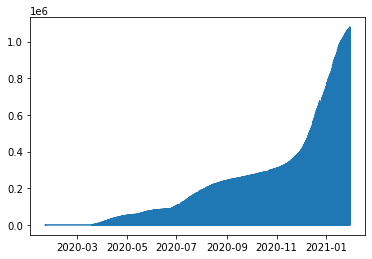

In [9]:
plt.plot(df['date'],df['confirmed_cases'])

countyFIPS
1        AxesSubplot(0.125,0.125;0.775x0.755)
1001     AxesSubplot(0.125,0.125;0.775x0.755)
1003     AxesSubplot(0.125,0.125;0.775x0.755)
1005     AxesSubplot(0.125,0.125;0.775x0.755)
1007     AxesSubplot(0.125,0.125;0.775x0.755)
                         ...                 
56037    AxesSubplot(0.125,0.125;0.775x0.755)
56039    AxesSubplot(0.125,0.125;0.775x0.755)
56041    AxesSubplot(0.125,0.125;0.775x0.755)
56043    AxesSubplot(0.125,0.125;0.775x0.755)
56045    AxesSubplot(0.125,0.125;0.775x0.755)
Name: confirmed_cases, Length: 3145, dtype: object

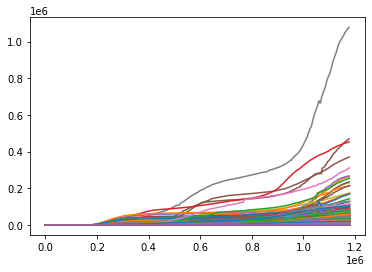

In [10]:
df.groupby(df['countyFIPS'])['confirmed_cases'].plot()

In [11]:
df['countyFIPS'].nunique()

3145

In [12]:
df['stateFIPS'].nunique()

51

In [13]:
co=df.groupby(df['countyFIPS'])['confirmed_cases']

In [14]:
co.value_counts()

countyFIPS  confirmed_cases
1           0                  354
            35                   7
            6                    3
            4                    2
            36                   2
                              ... 
56045       466                  1
            467                  1
            471                  1
            475                  1
            483                  1
Name: confirmed_cases, Length: 635747, dtype: int64

In [15]:
df['test_count'].value_counts()

.         128690
0           3593
270232      1955
6           1267
10          1198
           ...  
54547          1
498190         1
292844         1
316598         1
276704         1
Name: test_count, Length: 15902, dtype: int64

As we can see from the above cell, there are around 1lakh+ dot(.) values which can be treated as missing values.

In [16]:
df['test_count'].isnull().sum()

0

In [17]:
df['test_rate'].value_counts()

.         128690
0           3593
4403        2114
2992        1216
6912        1150
           ...  
34411          1
83404          1
134717         1
118192         1
912.0          1
Name: test_rate, Length: 14277, dtype: int64

In [18]:
df['google_mobility_retail_and_recreation'].unique()

array([  nan,    5.,   17.,   14.,    7.,    2.,    4.,  -13.,    1.,
         16.,   19.,    3.,    9.,    0.,   -1.,   12.,    8.,   -3.,
         15.,  -11.,    6.,   13.,   10.,   -4.,   -2.,   -6.,   11.,
        -12.,   -7.,   52.,   -9.,   -5.,   18.,  -34.,   47.,   -8.,
        -19.,   26.,   22.,  126.,   24.,   30.,   23.,   28.,   25.,
         20.,   41.,   31.,  -21.,  -16.,   37.,   56.,   21.,   27.,
        -14.,  -24.,   34.,   55.,   79.,   74.,   49.,   36.,   42.,
        -32.,   44.,   51.,  -30.,  -18.,  -35.,  -39.,   33.,   39.,
         46.,   45.,  -17.,  -29.,  -42.,   35.,   71.,  -10.,  -25.,
        102.,   29.,  -33.,   32.,   58.,  113.,  -36.,  -52.,   70.,
        -46.,  -28.,   61.,   40.,   87.,  -23.,   38.,  -38.,   62.,
         57.,  -20.,   68.,   54.,   63.,  153.,   43.,   53.,  -40.,
        -44.,  -15.,  -45.,  -26.,   81.,  -41.,  -31.,  -49.,   48.,
        -27.,   50.,   69.,   72.,   60.,  -56.,  -22.,  -43.,  -47.,
        -37.,   91.,

In [19]:
df['apple_mobility_transit'].isnull().sum()

1125000

In [20]:
dfc=df.copy()

### We now plot distribution curve of various columns to analyze how their values are distributed and to know more about the curves which follow guassian distribution.


/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='staffed_icu_adult_patients_confirmed_covid_SD', ylabel='Density'>

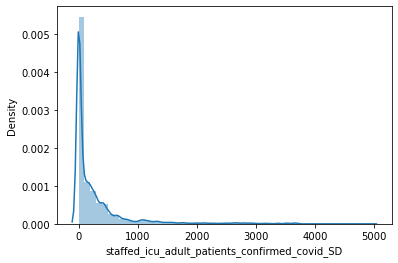

In [21]:
sns.distplot(df['staffed_icu_adult_patients_confirmed_covid_SD'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='staffed_icu_adult_patients_confirmed_covid_SD', ylabel='Density'>

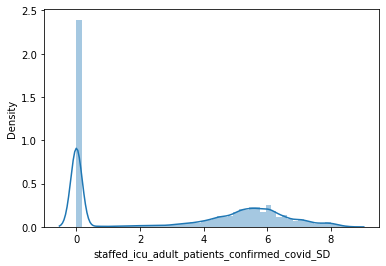

In [22]:
sns.distplot(np.log(df['staffed_icu_adult_patients_confirmed_covid_SD']+1))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='staffed_adult_icu_bed_occupancy_SD', ylabel='Density'>

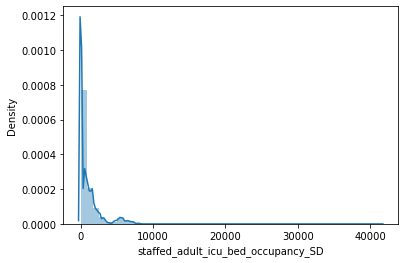

In [23]:
sns.distplot(df['staffed_adult_icu_bed_occupancy_SD'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='staffed_adult_icu_bed_occupancy_SD', ylabel='Density'>

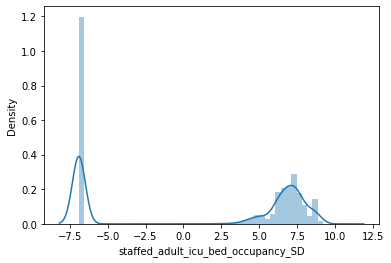

In [24]:
sns.distplot(np.log(df['staffed_adult_icu_bed_occupancy_SD']+0.001))

### We can perform logarithmic or sqrt function on the values of the column to transform it into a normal distribution curve.

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Sales_Residential (MWHr)', ylabel='Density'>

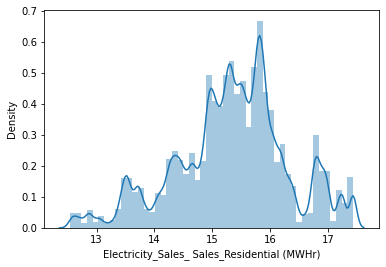

In [25]:
sns.distplot(np.log(df['Electricity_Sales_ Sales_Residential (MWHr)']))

In [26]:
dfc['Electricity_Sales_ Sales_Residential (MWHr)']=np.log(dfc['Electricity_Sales_ Sales_Residential (MWHr)'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Revenue_Residential ($ x1000)', ylabel='Density'>

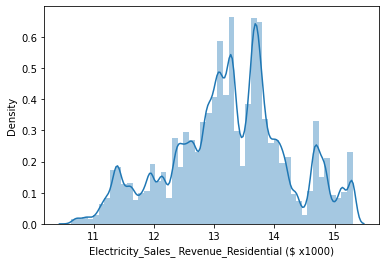

In [27]:
sns.distplot(np.log(df['Electricity_Sales_ Revenue_Residential ($ x1000)']))

In [28]:
dfc['Electricity_Sales_ Revenue_Residential ($ x1000)']=np.log(dfc['Electricity_Sales_ Revenue_Residential ($ x1000)'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Customers_Count_Commercial', ylabel='Density'>

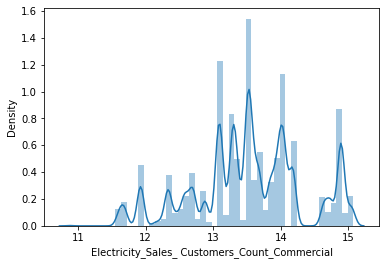

In [29]:
sns.distplot(np.log(df['Electricity_Sales_ Customers_Count_Commercial']+1))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Customers_Count_Residential', ylabel='Density'>

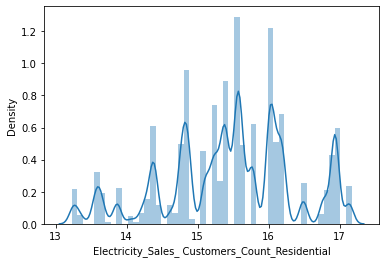

In [30]:
sns.distplot(np.log(df['Electricity_Sales_ Customers_Count_Residential']))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Sales_Commercial (MWHr)', ylabel='Density'>

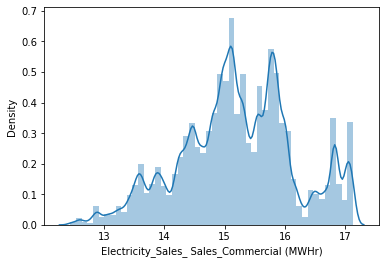

In [31]:
sns.distplot(np.log(df['Electricity_Sales_ Sales_Commercial (MWHr)']))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Sales_Transportation (MWHr)', ylabel='Density'>

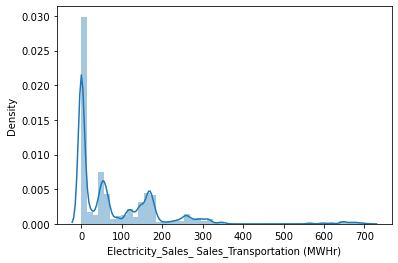

In [32]:
sns.distplot(np.sqrt(df['Electricity_Sales_ Sales_Transportation (MWHr)']))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Revenue_Commercial ($ x1000)', ylabel='Density'>

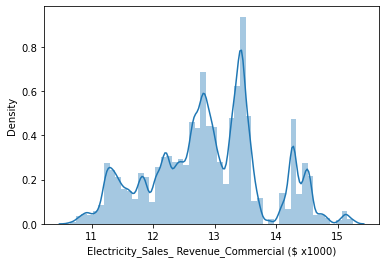

In [33]:
sns.distplot(np.log(df['Electricity_Sales_ Revenue_Commercial ($ x1000)']))

In [34]:
dfc['Electricity_Sales_ Revenue_Commercial ($ x1000)']=np.log(dfc['Electricity_Sales_ Revenue_Commercial ($ x1000)'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Electricity_Sales_ Revenue_Industrial ($ x1000)', ylabel='Density'>

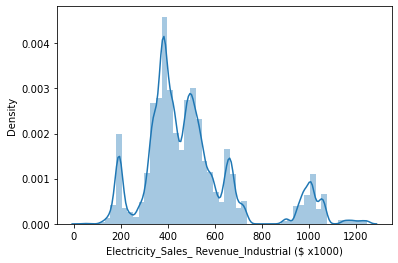

In [35]:
sns.distplot(np.sqrt(df['Electricity_Sales_ Revenue_Industrial ($ x1000)']))

In [36]:
dfc['Electricity_Sales_ Revenue_Industrial ($ x1000)']=np.sqrt(dfc['Electricity_Sales_ Revenue_Industrial ($ x1000)'])

In [37]:
dfc['Electricity_Sales_ Sales_Commercial (MWHr)']=np.log(dfc['Electricity_Sales_ Sales_Commercial (MWHr)'])

In [38]:
dfc['Electricity_Sales_ Sales_Industrial (MWHr)']=np.sqrt(dfc['Electricity_Sales_ Sales_Industrial (MWHr)'])
dfc['Electricity_Sales_ Customers_Count_Industrial']=np.sqrt(dfc['Electricity_Sales_ Customers_Count_Industrial'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='google_mobility_retail_and_recreation', ylabel='Density'>

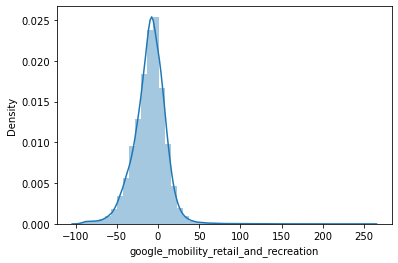

In [39]:
sns.distplot(dfc['google_mobility_retail_and_recreation'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='google_mobility_grocery_and_pharmacy', ylabel='Density'>

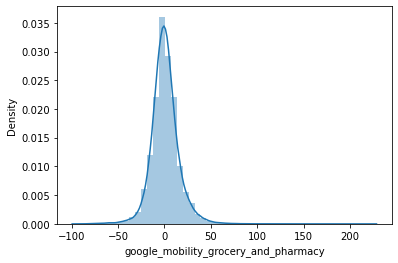

In [40]:
sns.distplot(dfc['google_mobility_grocery_and_pharmacy'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='apple_mobility_driving', ylabel='Density'>

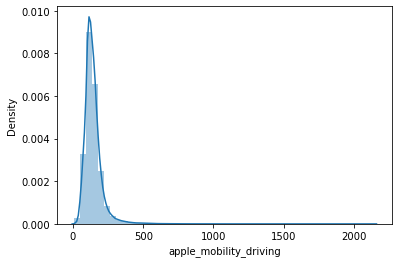

In [41]:
sns.distplot((dfc['apple_mobility_driving']))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='google_mobility_residential', ylabel='Density'>

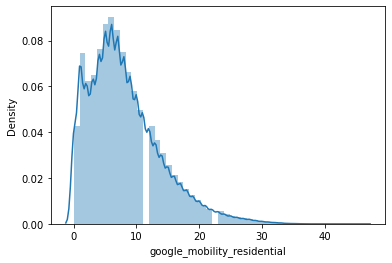

In [42]:
sns.distplot((abs(dfc['google_mobility_residential'])))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='google_mobility_workplaces', ylabel='Density'>

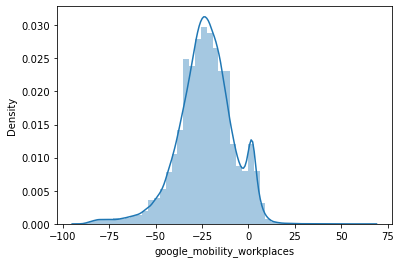

In [43]:
sns.distplot(dfc['google_mobility_workplaces'])

In [44]:
dfc['apple_mobility_driving']=np.log(dfc['apple_mobility_driving'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_adult_patients_hospitalized_confirmed_covid_SD'>

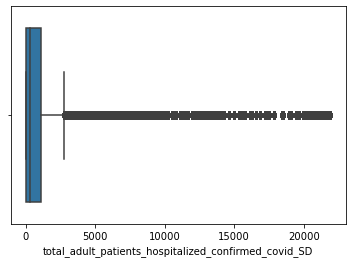

In [45]:
sns.boxplot(dfc['total_adult_patients_hospitalized_confirmed_covid_SD'])

In [46]:
dfc['month']=dfc['date'].dt.month

### On analyzing the month-wise distribution of the columns given below, it is observed that there are missing values in certain months of the year, so we dropped those columns.

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INTERNATIONAL_Air_Passengers', ylabel='Density'>

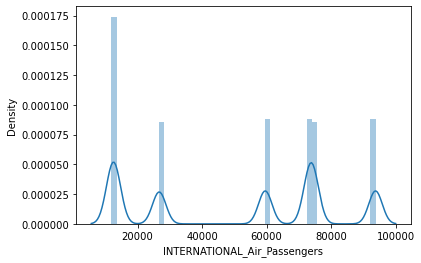

In [47]:
sns.distplot((dfc['INTERNATIONAL_Air_Passengers']))

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DOMESTIC_Flights_Cnt', ylabel='Density'>

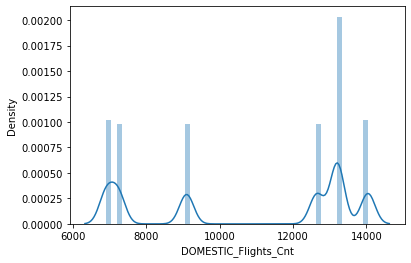

In [48]:
sns.distplot((dfc['DOMESTIC_Flights_Cnt']))

In [49]:
dfc[dfc['INTERNATIONAL_Flights_Cnt'].isnull()]['month'].value_counts()

1     125800
12     97495
3      97495
11     94350
2      91205
Name: month, dtype: int64

In [50]:
dfc[dfc['DOMESTIC_Flights_Cnt'].isnull()]['month'].value_counts()

1     125800
12     97495
3      97495
11     94350
2      91205
Name: month, dtype: int64

In [51]:
dfc.groupby(dfc['month'])['DOMESTIC_Flights_Cnt'].count()

month
1         0
2         0
3         0
4     94350
5     97495
6     94350
7     97495
8     97495
9     94350
10    97495
11        0
12        0
Name: DOMESTIC_Flights_Cnt, dtype: int64

In [52]:
dfc.groupby(dfc['month'])['INTERNATIONAL_Air_Passengers'].count()

month
1         0
2         0
3         0
4     94350
5     97495
6     94350
7     97495
8     97495
9     94350
10    97495
11        0
12        0
Name: INTERNATIONAL_Air_Passengers, dtype: int64

In [53]:
dfc.drop(['DOMESTIC_Air_Passengers','INTERNATIONAL_Air_Passengers','DOMESTIC_Flights_Cnt','INTERNATIONAL_Flights_Cnt'],inplace=True,axis=1)

In [54]:
dfc.describe()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,...,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,month
count,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,566919.000000,512485.000000,196917.000000,318671.000000,836664.000000,456569.000000,...,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.179375e+06
mean,3.035730e+04,3.026518e+01,2.016216e+03,4.852388e+01,-10.303391,0.584640,22.697456,-12.458790,-23.158080,7.895589,...,2.333414e+01,1.201366e+01,6.249557e-01,1.125452e+04,1.661977e+04,1.197940e-01,7.872846e-02,1.291507e-01,4.242515e-01,6.381333e+00
std,1.517704e+04,1.514963e+01,1.119552e+04,2.867077e+02,19.828237,15.212703,59.530412,26.229057,15.199087,6.011012,...,5.527166e+01,2.594898e+01,1.437939e-01,1.256925e+04,1.767744e+04,8.373358e-02,6.171769e-02,1.436028e-01,6.663241e-01,3.512444e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-100.000000,-96.000000,-95.000000,-93.000000,-92.000000,-46.000000,...,-1.200000e+01,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.817300e+04,1.800000e+01,4.000000e+00,0.000000e+00,-21.000000,-8.000000,-17.000000,-31.000000,-32.000000,4.000000,...,0.000000e+00,0.000000e+00,5.746418e-01,2.879000e+03,4.948000e+03,6.339762e-02,3.786575e-02,0.000000e+00,0.000000e+00,3.000000e+00
50%,2.917300e+04,2.900000e+01,1.330000e+02,2.000000e+00,-9.000000,0.000000,9.000000,-10.000000,-23.000000,7.000000,...,4.000000e+00,1.000000e+00,6.517731e-01,7.432000e+03,1.136600e+04,9.945355e-02,6.154683e-02,9.843400e-02,6.058632e-01,6.000000e+00
75%,4.507900e+04,4.500000e+01,9.100000e+02,1.800000e+01,2.000000,8.000000,48.000000,5.000000,-14.000000,11.000000,...,2.400000e+01,1.200000e+01,7.126916e-01,1.377300e+04,2.045100e+04,1.699732e-01,1.116009e-01,2.268285e-01,7.427066e-01,9.000000e+00
max,5.604500e+04,5.600000e+01,1.078329e+06,1.633200e+04,261.000000,225.000000,709.000000,252.000000,66.000000,42.000000,...,1.318000e+03,4.470000e+02,1.228947e+00,5.747100e+04,1.046650e+05,1.220200e+00,1.000000e+00,1.073519e+00,5.849506e+01,1.200000e+01


### Correlation Matrix

In [55]:
df.corr()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
countyFIPS,1.000000,0.999075,-0.038589,-0.027700,0.037331,0.029942,0.122576,0.069000,-0.008129,0.001743,...,0.059341,-0.024581,0.073464,0.055976,0.095661,0.090229,-0.084532,-0.077226,-0.040781,-0.015210
stateFIPS,0.999075,1.000000,-0.038593,-0.026957,0.037391,0.030213,0.123133,0.068906,-0.008087,0.001796,...,0.058406,-0.024996,0.072620,0.056079,0.095004,0.089545,-0.084597,-0.077261,-0.041558,-0.015384
confirmed_cases,-0.038589,-0.038593,1.000000,0.782162,-0.129596,-0.145372,-0.114059,-0.224437,-0.106674,0.121606,...,0.219427,0.129699,0.156691,0.108743,0.176468,0.164920,0.121318,0.142239,0.143295,0.075363
deaths,-0.027700,-0.026957,0.782162,1.000000,-0.139064,-0.137459,-0.013170,-0.235801,-0.121375,0.132786,...,0.129065,0.090801,0.095571,0.100160,0.150969,0.143521,0.067827,0.086593,0.062855,0.046425
google_mobility_retail_and_recreation,0.037331,0.037391,-0.129596,-0.139064,1.000000,0.661998,0.339005,0.639495,0.575405,-0.673247,...,-0.080664,-0.029489,-0.031284,0.059369,-0.057265,-0.072504,-0.300470,-0.225862,-0.006894,0.048051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inpatient_beds_utilization_denominator_SD,0.090229,0.089545,0.164920,0.143521,-0.072504,-0.156304,-0.152915,-0.095148,-0.074390,0.017623,...,0.695205,0.551566,0.600201,0.341437,0.991283,1.000000,0.249270,0.294452,0.289484,0.170347
percent_of_inpatients_with_covid_SD,-0.084532,-0.084597,0.121318,0.067827,-0.300470,-0.239471,-0.245193,-0.196844,-0.235449,0.343288,...,0.455667,0.275365,0.348443,0.329052,0.267107,0.249270,1.000000,0.962740,0.610427,0.198671
inpatient_bed_covid_utilization_SD,-0.077226,-0.077261,0.142239,0.086593,-0.225862,-0.208571,-0.227281,-0.171933,-0.184313,0.281139,...,0.514553,0.309515,0.398860,0.446887,0.327029,0.294452,0.962740,1.000000,0.665785,0.239989
adult_icu_bed_covid_utilization_SD,-0.040781,-0.041558,0.143295,0.062855,-0.006894,-0.159646,-0.250522,-0.004168,0.030109,-0.038337,...,0.609833,0.423331,0.517478,0.435457,0.331496,0.289484,0.610427,0.665785,1.000000,0.463116


### Heatmap depicting correlation between all the variables.

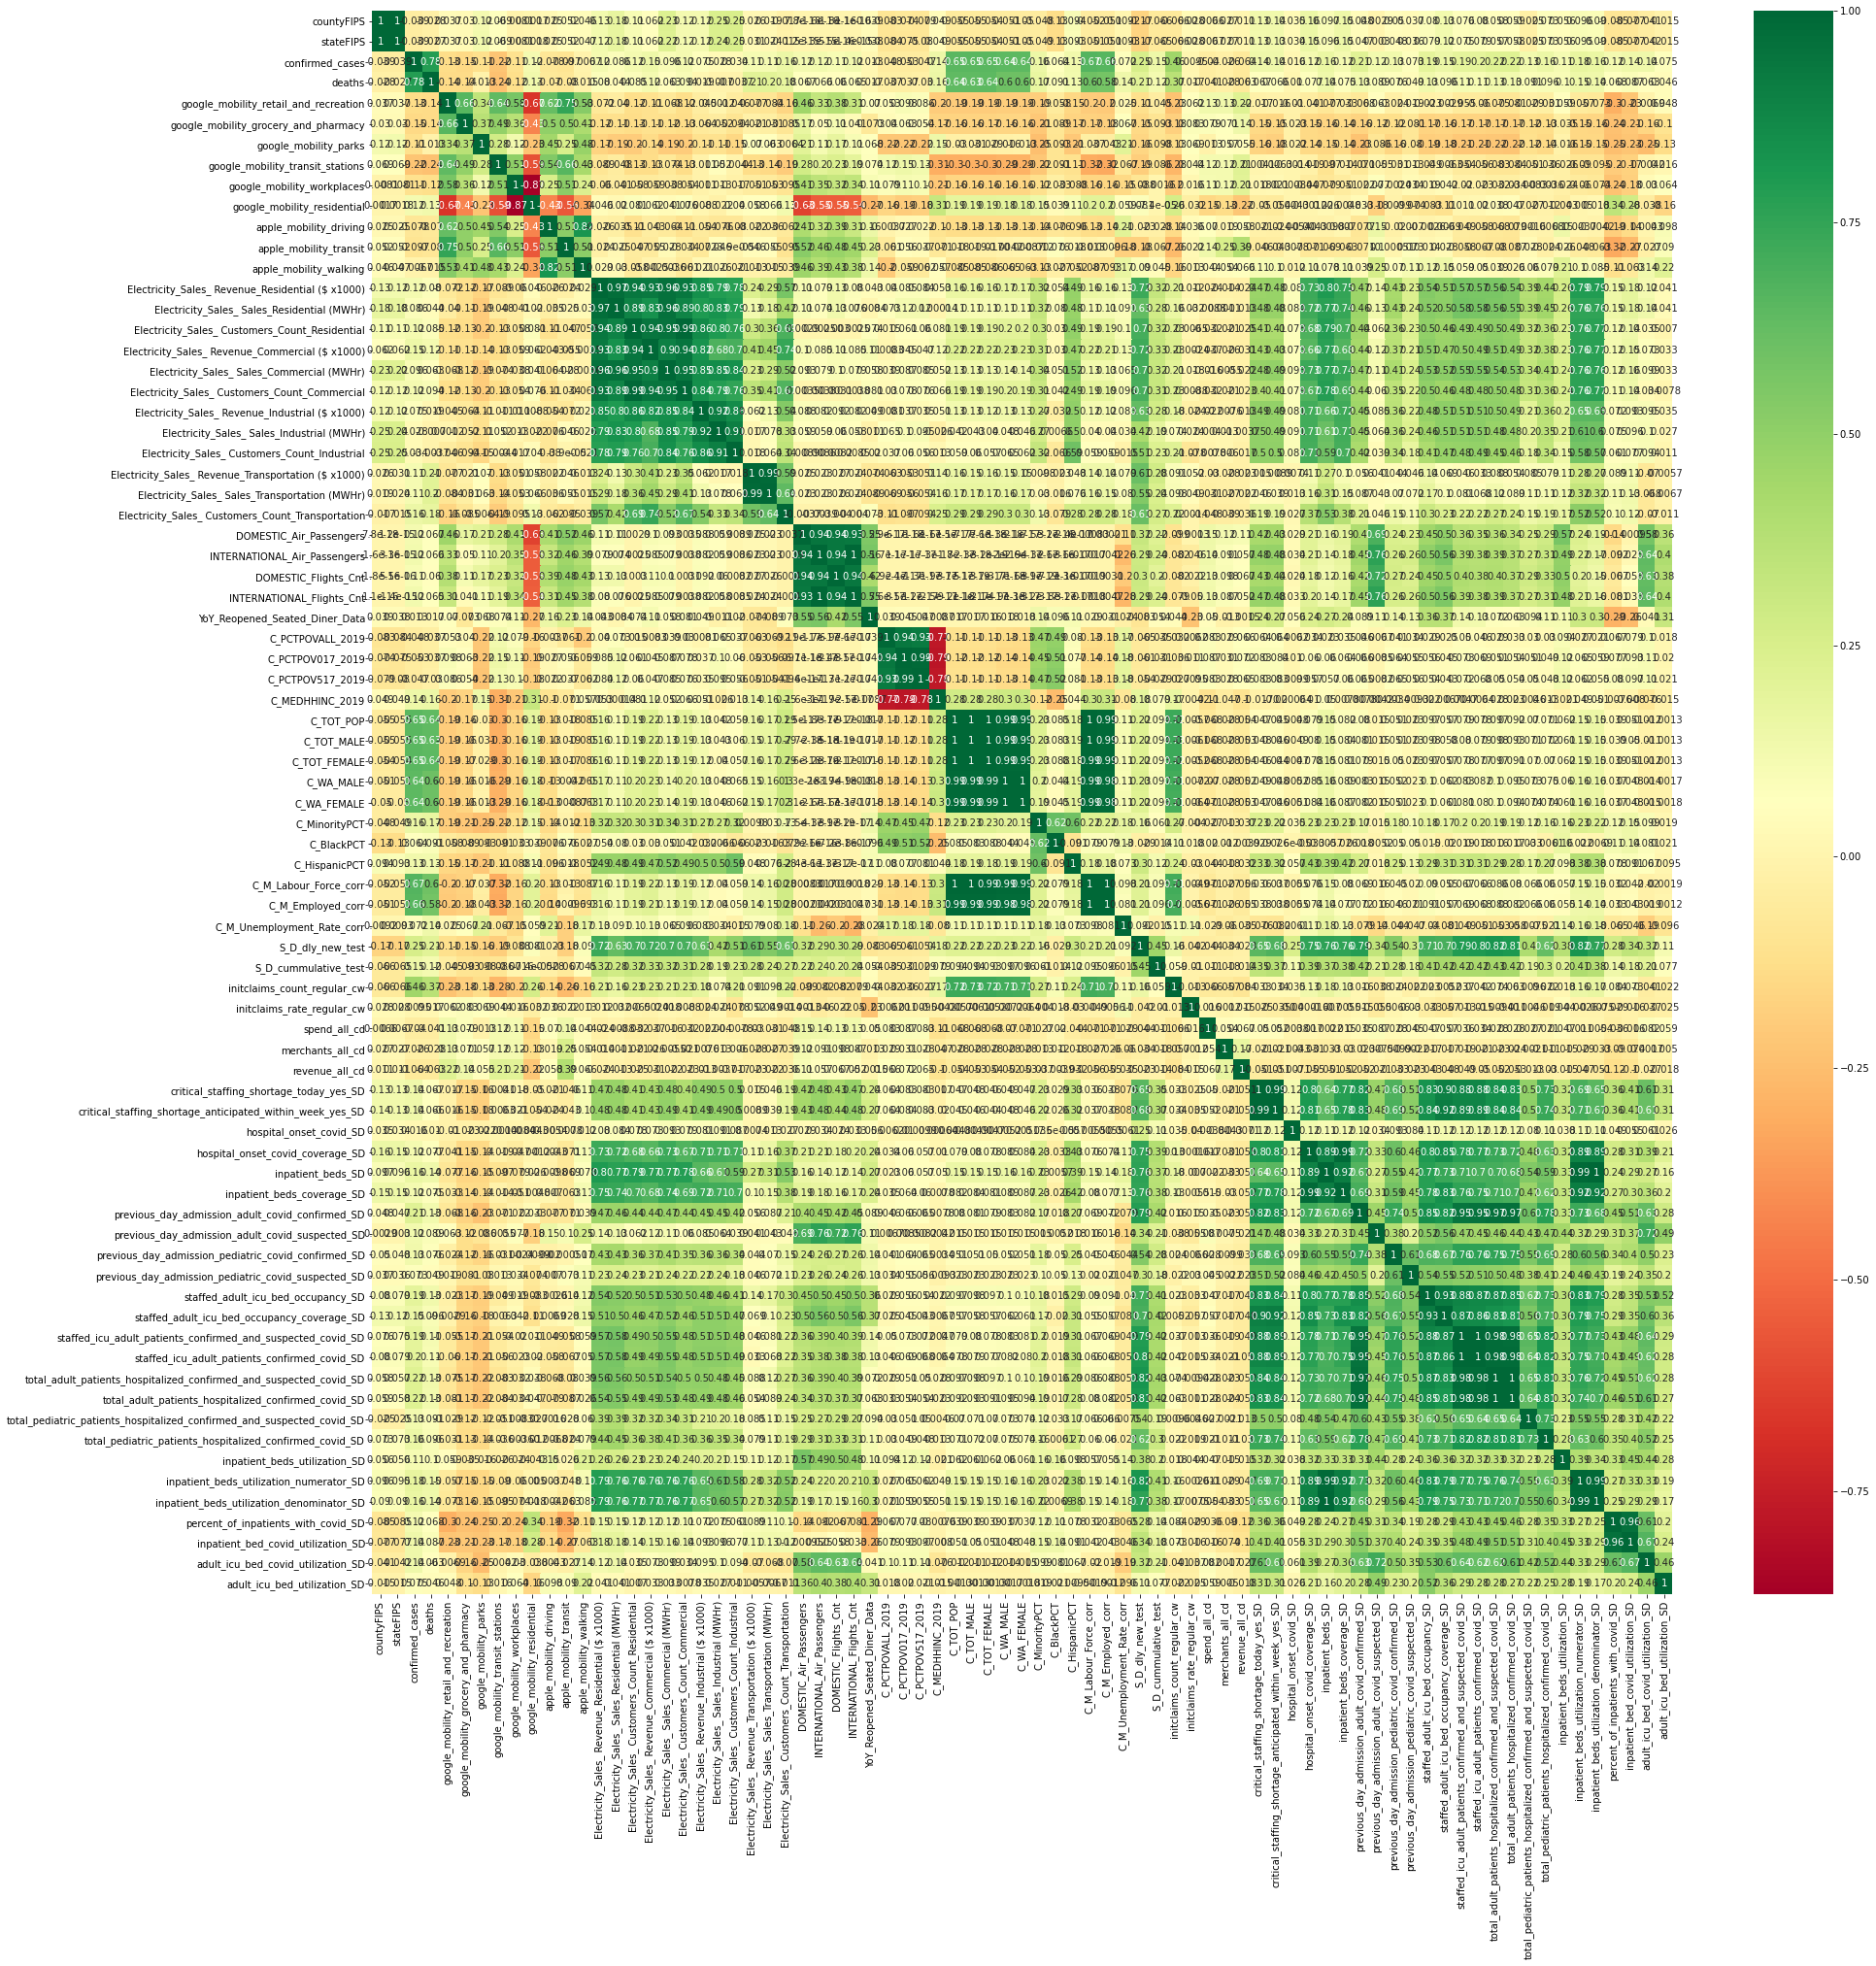

In [56]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## FEATURE ENGINEERING

## DATA CLEANING AND TREATMENT

  We dropped the columns having large missing values close to 65-70% of the dataset.                                            
  We filled other columns having missing values by trying and testing various techniques. 

In [57]:
dfc.drop(['apple_mobility_walking','apple_mobility_transit'],inplace=True,axis=1)

In [58]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 77 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   566919 non-null   float64       
 6   go

In [59]:
df['google_mobility_grocery_and_pharmacy'].nunique()

275

In [60]:
dfc['google_mobility_parks'].isnull().mean()

0.8330327503974563

In [61]:
col=[col for col in dfc.columns if dfc[col].isnull().mean()>=0.65]

In [62]:
col

['google_mobility_parks',
 'google_mobility_transit_stations',
 'YoY_Reopened_Seated_Diner_Data',
 'S_D_dly_new_test',
 'S_D_cummulative_test',
 'initclaims_count_regular_cw',
 'initclaims_rate_regular_cw',
 'merchants_all_cd',
 'revenue_all_cd']

In [63]:
dfc.drop(col,inplace=True,axis=1)

In [64]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   566919 non-null   float64       
 6   go

### Filling the missing values with median of corresponding columns folllowing normal distribution.

In [65]:
dfc.iloc[:,10:22].median()

Electricity_Sales_ Revenue_Residential ($ x1000)       1.329037e+01
Electricity_Sales_ Sales_Residential (MWHr)            1.539852e+01
Electricity_Sales_ Customers_Count_Residential         5.552626e+06
Electricity_Sales_ Revenue_Commercial ($ x1000)        1.290055e+01
Electricity_Sales_ Sales_Commercial (MWHr)             1.517682e+01
Electricity_Sales_ Customers_Count_Commercial          7.460200e+05
Electricity_Sales_ Revenue_Industrial ($ x1000)        4.563260e+02
Electricity_Sales_ Sales_Industrial (MWHr)             1.824308e+03
Electricity_Sales_ Customers_Count_Industrial          1.398499e+02
Electricity_Sales_ Revenue_Transportation ($ x1000)    1.897560e+02
Electricity_Sales_ Sales_Transportation (MWHr)         2.283798e+03
Electricity_Sales_ Customers_Count_Transportation      2.000000e+00
dtype: float64

In [66]:
dfc.iloc[:,46:71].describe()

,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,...,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,month
count,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,...,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.179375e+06
mean,1.697160e+04,1.311860e+02,1.464803e+02,9.525773e+01,2.646606e+00,8.238971e+00,9.923145e+02,8.936785e+01,3.166054e+02,2.925032e+02,...,2.333414e+01,1.201366e+01,6.249557e-01,1.125452e+04,1.661977e+04,1.197940e-01,7.872846e-02,1.291507e-01,4.242515e-01,6.381333e+00
std,1.789624e+04,1.251359e+02,2.803866e+02,8.930772e+01,6.321379e+00,2.125019e+01,1.601542e+03,1.283476e+02,6.066635e+02,5.819864e+02,...,5.527166e+01,2.594898e+01,1.437939e-01,1.256925e+04,1.767744e+04,8.373358e-02,6.171769e-02,1.436028e-01,6.663241e-01,3.512444e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-6.200000e+01,-8.880000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.200000e+01,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.156000e+03,5.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.746418e-01,2.879000e+03,4.948000e+03,6.339762e-02,3.786575e-02,0.000000e+00,0.000000e+00,3.000000e+00
50%,1.158200e+04,1.090000e+02,3.400000e+01,1.630000e+02,0.000000e+00,1.000000e+00,3.830000e+02,5.900000e+01,7.700000e+01,7.000000e+01,...,4.000000e+00,1.000000e+00,6.517731e-01,7.432000e+03,1.136600e+04,9.945355e-02,6.154683e-02,9.843400e-02,6.058632e-01,6.000000e+00
75%,2.074800e+04,1.450000e+02,1.600000e+02,1.630000e+02,2.000000e+00,9.000000e+00,1.366000e+03,1.270000e+02,3.700000e+02,3.150000e+02,...,2.400000e+01,1.200000e+01,7.126916e-01,1.377300e+04,2.045100e+04,1.699732e-01,1.116009e-01,2.268285e-01,7.427066e-01,9.000000e+00
max,1.046650e+05,5.960000e+02,2.550000e+03,1.442000e+03,1.660000e+02,3.100000e+02,4.147300e+04,5.960000e+02,4.942000e+03,4.928000e+03,...,1.318000e+03,4.470000e+02,1.228947e+00,5.747100e+04,1.046650e+05,1.220200e+00,1.000000e+00,1.073519e+00,5.849506e+01,1.200000e+01


In [67]:
dfc.groupby(dfc['month'])['spend_all_cd'].mean()[1]

-24.958703016615583

In [68]:
dfc[dfc['spend_all_cd']<0]

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,...,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,month
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,4.516994,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,1
9,1019,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,4.716533,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,1
16,1033,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,4.648038,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,1
19,1039,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,4.588634,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,1
23,1047,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,4.690705,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094446,56019,56,2021-01-03,522,6,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.442546,751.0,1697.0,0.165981,0.073333,0.204724,0.34058,1
1094447,56021,56,2021-01-03,7098,62,-23.0,-11.0,-14.0,6.0,4.764138,...,1.0,1.0,0.442546,751.0,1697.0,0.165981,0.073333,0.204724,0.34058,1
1094454,56035,56,2021-01-03,599,6,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.442546,751.0,1697.0,0.165981,0.073333,0.204724,0.34058,1
1094456,56039,56,2021-01-03,2159,4,-31.0,NaN,-30.0,NaN,5.232818,...,1.0,1.0,0.442546,751.0,1697.0,0.165981,0.073333,0.204724,0.34058,1


In [69]:
dfc.groupby(dfc['month'])['google_mobility_retail_and_recreation'].mean()

month
1    -18.589396
2      6.165350
3    -10.283701
4    -34.546390
5    -15.038434
6     -2.816491
7     -2.405706
8     -4.772396
9     -5.634248
10    -6.388343
11   -12.844908
12   -12.615787
Name: google_mobility_retail_and_recreation, dtype: float64

In [70]:
dfc[dfc['google_mobility_retail_and_recreation'].isnull()]['month'].value_counts()

1     83287
8     62254
9     55638
2     55378
5     51078
4     48553
7     47338
12    47278
10    46728
6     46216
11    45566
3     23142
Name: month, dtype: int64

In [71]:
dfc['google_mobility_retail_and_recreation'].mean()

-10.30339078422138

In [72]:
dft=dfc.copy()

In [73]:
dfm=dft.groupby('google_mobility_retail_and_recreation')

In [74]:
dfm['month'].value_counts()

google_mobility_retail_and_recreation  month
-100.0                                 3        4
                                       4        4
                                       12       3
-98.0                                  10       1
                                       12       1
                                               ..
 241.0                                 8        1
 243.0                                 8        1
 245.0                                 7        1
 254.0                                 8        1
 261.0                                 8        1
Name: month, Length: 2263, dtype: int64

In [75]:
dft['google_mobility_retail_and_recreation'].fillna(dft.groupby(dft['month'])['google_mobility_retail_and_recreation'].transform('mean'),inplace=True)

In [76]:
dft['google_mobility_retail_and_recreation'].isnull().sum()

0

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='google_mobility_retail_and_recreation', ylabel='Density'>

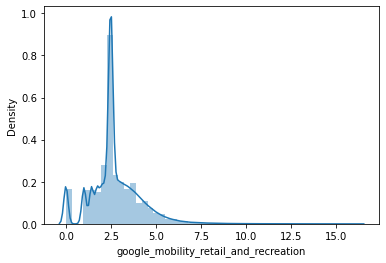

In [77]:
sns.distplot(np.sqrt(dft['google_mobility_retail_and_recreation']))

In [78]:
cols=['google_mobility_grocery_and_pharmacy','google_mobility_workplaces','google_mobility_residential','apple_mobility_driving','spend_all_cd']

In [79]:
for col in cols:
    dft[col].fillna(dft.groupby(dft['month'])[col].transform('mean'),inplace=True)

In [80]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   1179375 non-null  float64       
 6   go

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spend_all_cd', ylabel='Density'>

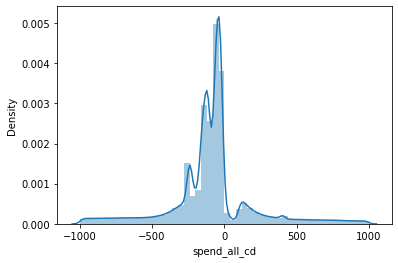

In [81]:
sns.distplot(dft['spend_all_cd'])

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='staffed_adult_icu_bed_occupancy_SD', ylabel='Density'>

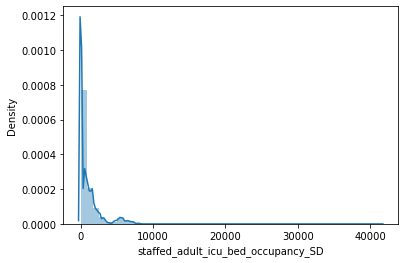

In [82]:
sns.distplot(dft['staffed_adult_icu_bed_occupancy_SD'])

In [83]:
dft1=dft.copy()

In [84]:
col=[col for col in dft1.columns if dft1[col].isnull().sum()>0]

In [85]:
col

['Electricity_Sales_ Revenue_Residential ($ x1000)',
 'Electricity_Sales_ Sales_Residential (MWHr)',
 'Electricity_Sales_ Customers_Count_Residential',
 'Electricity_Sales_ Revenue_Commercial ($ x1000)',
 'Electricity_Sales_ Sales_Commercial (MWHr)',
 'Electricity_Sales_ Customers_Count_Commercial',
 'Electricity_Sales_ Revenue_Industrial ($ x1000)',
 'Electricity_Sales_ Sales_Industrial (MWHr)',
 'Electricity_Sales_ Customers_Count_Industrial',
 'Electricity_Sales_ Revenue_Transportation ($ x1000)',
 'Electricity_Sales_ Sales_Transportation (MWHr)',
 'Electricity_Sales_ Customers_Count_Transportation',
 'C_PCTPOVALL_2019',
 'C_PCTPOV017_2019',
 'C_PCTPOV517_2019',
 'C_MEDHHINC_2019',
 'C_TOT_POP',
 'C_TOT_MALE',
 'C_TOT_FEMALE',
 'C_WA_MALE',
 'C_WA_FEMALE',
 'C_MinorityPCT',
 'C_BlackPCT',
 'C_HispanicPCT',
 'C_M_Labour_Force_corr',
 'C_M_Employed_corr',
 'C_M_Unemployment_Rate_corr',
 'critical_staffing_shortage_today_yes_SD',
 'critical_staffing_shortage_anticipated_within_week_yes

In [86]:
for cols in col:
    dft1[cols].fillna(dft1.groupby(dft1['month'])[cols].transform('median'),inplace=True)

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='staffed_adult_icu_bed_occupancy_SD', ylabel='Density'>

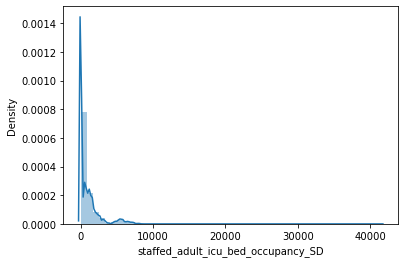

In [87]:
sns.distplot(dft1['staffed_adult_icu_bed_occupancy_SD'])

In [88]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   1179375 non-null  float64       
 6   go

In [89]:
dft1.fillna(dft1.median(),inplace=True)

<ipython-input-89-5ed403b3fa47>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dft1.fillna(dft1.median(),inplace=True)


In [90]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   1179375 non-null  float64       
 6   go

### On observing the given 4 columns, its visible that there are around 1lakh+ dot(.) values which can be treated as nan values.

In [91]:
col1=['test_rate','new_test_count','new_test_rate','test_count']

In [92]:
dft1['test_count'].value_counts()

.         128690
0           3593
270232      1955
6           1267
10          1198
           ...  
54547          1
498190         1
292844         1
316598         1
276704         1
Name: test_count, Length: 15902, dtype: int64

In [93]:
dft1['test_count'].describe()

count     1179375
unique      15902
top             .
freq       128690
Name: test_count, dtype: object

In [94]:
dft1['test_count']=pd.to_numeric(dft1['test_count'],errors='coerce')

In [95]:
dft1['test_count'].isnull().sum()

128690

In [96]:
dft1['test_rate']=pd.to_numeric(dft1['test_count'],errors='coerce')
dft1['new_test_count']=pd.to_numeric(dft1['test_count'],errors='coerce')
dft1['new_test_rate']=pd.to_numeric(dft1['test_count'],errors='coerce')

In [97]:
dft1.isnull().sum()>0

countyFIPS                             False
stateFIPS                              False
date                                   False
confirmed_cases                        False
deaths                                 False
                                       ...  
percent_of_inpatients_with_covid_SD    False
inpatient_bed_covid_utilization_SD     False
adult_icu_bed_covid_utilization_SD     False
adult_icu_bed_utilization_SD           False
month                                  False
Length: 68, dtype: bool

In [98]:
for cols in col1:
    dft1[cols].fillna(dft1.groupby(dft1['month'])[cols].transform('mean'),inplace=True)

In [99]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  int64         
 5   google_mobility_retail_and_recreation                                   1179375 non-null  float64       
 6   go

In [100]:
Y=pd.DataFrame(df.iloc[:,0:4])

In [101]:
Y.dtypes

countyFIPS                  int64
stateFIPS                   int64
date               datetime64[ns]
confirmed_cases             int64
dtype: object

In [102]:
dft1.drop('deaths',inplace=True,axis=1)

In [103]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 67 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   google_mobility_retail_and_recreation                                   1179375 non-null  float64       
 5   google_mobility_grocery_and_pharmacy                                    1179375 non-null  float64       
 6   go

## Reading the validation dataset and performing the same steps as we did in the case of training file.

In [104]:
dftest=pd.read_csv('/Users/satya/Downloads/EQ-2021-Validation-Data-Sample.csv')

In [105]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 80 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   date                                                                    47130 non-null  object 
 3   google_mobility_retail_and_recreation                                   24498 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    21775 non-null  float64
 5   google_mobility_parks                                                   11009 non-null  float64
 6   google_mobility_transit_stations                                        14863 

In [106]:
dft2=dftest.copy()

In [107]:
Y1=pd.DataFrame(dft2.iloc[:,0:3])

In [108]:
Y1

,countyFIPS,stateFIPS,date
0,1001,1,2021-02-01
1,1003,1,2021-02-01
2,1005,1,2021-02-01
3,1007,1,2021-02-01
4,1009,1,2021-02-01
...,...,...,...
47125,56037,56,2021-02-15
47126,56039,56,2021-02-15
47127,56041,56,2021-02-15
47128,56043,56,2021-02-15


In [109]:
dft2['date']=pd.to_datetime(dft2['date'])
dft2['month']=dft2['date'].dt.month
dft2.drop(['apple_mobility_transit','apple_mobility_walking'], inplace=True, axis=1)
col1=['google_mobility_parks','google_mobility_transit_stations','YoY_Reopened_Seated_Diner_Data','S_D_dly_new_test','S_D_cummulative_test','initclaims_count_regular_cw','initclaims_rate_regular_cw','merchants_all_cd','revenue_all_cd']
dft2.drop(col1, inplace=True, axis=1)
dft2.drop(['DOMESTIC_Air_Passengers','INTERNATIONAL_Air_Passengers','DOMESTIC_Flights_Cnt','INTERNATIONAL_Flights_Cnt'],inplace=True,axis=1)

In [110]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 66 columns):
 #   Column                                                                  Non-Null Count  Dtype         
---  ------                                                                  --------------  -----         
 0   countyFIPS                                                              47130 non-null  int64         
 1   stateFIPS                                                               47130 non-null  int64         
 2   date                                                                    47130 non-null  datetime64[ns]
 3   google_mobility_retail_and_recreation                                   24498 non-null  float64       
 4   google_mobility_grocery_and_pharmacy                                    21775 non-null  float64       
 5   google_mobility_workplaces                                              38154 non-null  float64       
 6   google_mobility_reside

In [111]:
cols1=['google_mobility_retail_and_recreation','google_mobility_grocery_and_pharmacy','google_mobility_workplaces','google_mobility_residential','apple_mobility_driving','spend_all_cd']

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='google_mobility_retail_and_recreation', ylabel='Density'>

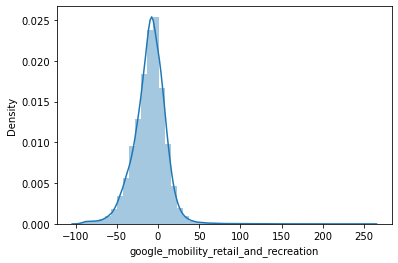

In [112]:
sns.distplot(df['google_mobility_retail_and_recreation'])

In [113]:
for col in cols1:
    dft2[col].fillna(dft2.groupby(dft2['month'])[col].transform('mean'),inplace=True)

In [114]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 66 columns):
 #   Column                                                                  Non-Null Count  Dtype         
---  ------                                                                  --------------  -----         
 0   countyFIPS                                                              47130 non-null  int64         
 1   stateFIPS                                                               47130 non-null  int64         
 2   date                                                                    47130 non-null  datetime64[ns]
 3   google_mobility_retail_and_recreation                                   47130 non-null  float64       
 4   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64       
 5   google_mobility_workplaces                                              47130 non-null  float64       
 6   google_mobility_reside

In [115]:
col=[col for col in dft2.columns if dft2[col].isnull().sum()>0]

In [116]:
col

['C_PCTPOVALL_2019',
 'C_PCTPOV017_2019',
 'C_PCTPOV517_2019',
 'C_MEDHHINC_2019',
 'C_TOT_POP',
 'C_TOT_MALE',
 'C_TOT_FEMALE',
 'C_WA_MALE',
 'C_WA_FEMALE',
 'C_MinorityPCT',
 'C_BlackPCT',
 'C_HispanicPCT',
 'C_M_Labour_Force_corr',
 'C_M_Employed_corr',
 'C_M_Unemployment_Rate_corr']

In [117]:
for cols in col:
    dft2[cols].fillna(dft2.groupby(dft2['month'])[cols].transform('median'),inplace=True)

In [118]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 66 columns):
 #   Column                                                                  Non-Null Count  Dtype         
---  ------                                                                  --------------  -----         
 0   countyFIPS                                                              47130 non-null  int64         
 1   stateFIPS                                                               47130 non-null  int64         
 2   date                                                                    47130 non-null  datetime64[ns]
 3   google_mobility_retail_and_recreation                                   47130 non-null  float64       
 4   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64       
 5   google_mobility_workplaces                                              47130 non-null  float64       
 6   google_mobility_reside

### Extracting additional information by creating new columns with the help of existing ones.

In [119]:
dft1['date']

0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
1179370   2021-01-30
1179371   2021-01-30
1179372   2021-01-30
1179373   2021-01-30
1179374   2021-01-30
Name: date, Length: 1179375, dtype: datetime64[ns]

In [120]:
dft2['date']

0       2021-02-01
1       2021-02-01
2       2021-02-01
3       2021-02-01
4       2021-02-01
           ...    
47125   2021-02-15
47126   2021-02-15
47127   2021-02-15
47128   2021-02-15
47129   2021-02-15
Name: date, Length: 47130, dtype: datetime64[ns]

In [121]:
dft1['year']=dft1['date'].dt.year

In [122]:
dft1['day']=dft1['date'].dt.day

In [123]:
dft1['day']

0          22
1          22
2          22
3          22
4          22
           ..
1179370    30
1179371    30
1179372    30
1179373    30
1179374    30
Name: day, Length: 1179375, dtype: int64

In [124]:
dft2['year']=dft2['date'].dt.year

In [125]:
dft2['day']=dft2['date'].dt.day

In [126]:
dft1.drop('date',inplace=True,axis=1)
dft2.drop('date',inplace=True,axis=1)

In [127]:
dft1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype  
---  ------                                                                  --------------    -----  
 0   countyFIPS                                                              1179375 non-null  int64  
 1   stateFIPS                                                               1179375 non-null  int64  
 2   confirmed_cases                                                         1179375 non-null  int64  
 3   google_mobility_retail_and_recreation                                   1179375 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    1179375 non-null  float64
 5   google_mobility_workplaces                                              1179375 non-null  float64
 6   google_mobility_residential                               

In [128]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 67 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   google_mobility_retail_and_recreation                                   47130 non-null  float64
 3   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 4   google_mobility_workplaces                                              47130 non-null  float64
 5   google_mobility_residential                                             47130 non-null  float64
 6   apple_mobility_driving                                                  47130 

In [129]:
dft2.month

0        2
1        2
2        2
3        2
4        2
        ..
47125    2
47126    2
47127    2
47128    2
47129    2
Name: month, Length: 47130, dtype: int64

## Model Development

In [130]:
X=dft1.drop('confirmed_cases',axis=1)
y=dft1['confirmed_cases']

In [131]:
X

,countyFIPS,stateFIPS,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,...,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,month,year,day
0,1001,1,-18.589396,-9.733801,-22.481481,9.720348,4.620157,13.416066,15.504541,4585564.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,2020,22
1,1003,1,-18.589396,-9.733801,-22.481481,9.720348,4.635893,13.416066,15.504541,4585564.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,2020,22
2,1005,1,-18.589396,-9.733801,-22.481481,9.720348,4.793060,13.416066,15.504541,4585564.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,2020,22
3,1007,1,-18.589396,-9.733801,-22.481481,9.720348,4.711151,13.416066,15.504541,4585564.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,2020,22
4,1009,1,-18.589396,-9.733801,-22.481481,9.720348,4.516994,13.416066,15.504541,4585564.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,2020,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179370,56037,56,-18.589396,-9.733801,-22.481481,9.720348,5.082211,13.392881,15.504541,5532620.0,...,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263,1,2021,30
1179371,56039,56,-18.589396,-9.733801,-22.481481,9.720348,5.145166,13.392881,15.504541,5532620.0,...,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263,1,2021,30
1179372,56041,56,-18.589396,-9.733801,-22.481481,9.720348,4.997347,13.392881,15.504541,5532620.0,...,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263,1,2021,30
1179373,56043,56,-18.589396,-9.733801,-22.481481,9.720348,4.748805,13.392881,15.504541,5532620.0,...,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263,1,2021,30


In [132]:
y

0             0
1             0
2             0
3             0
4             0
           ... 
1179370    3472
1179371    3078
1179372    1960
1179373     864
1179374     610
Name: confirmed_cases, Length: 1179375, dtype: int64

In [133]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score

### Splitting training dataset for testing the accuracy score of various models.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### We have used Decision Tree,Random forest, Adaboost  for prediction

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

### Scaling the data using Standard Scaler

In [136]:
sc=StandardScaler()
X.iloc[:,:]=sc.fit_transform(X.iloc[:,:])

In [137]:
X.describe()

,countyFIPS,stateFIPS,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,...,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,month,year,day
count,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,...,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06
mean,5.060802e-16,2.892188e-16,-6.052510e-13,-2.718762e-14,-4.139613e-13,2.643548e-13,6.281977e-13,-7.799488e-14,-5.181341e-14,-3.805463e-14,...,1.854860e-13,5.167726e-14,-1.137316e-13,-1.560678e-13,8.026680e-14,-4.342730e-12,-6.452553e-13,4.525833e-12,-2.507764e-12,5.781843e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.000146e+00,-1.931743e+00,-5.792759e+00,-8.843755e+00,-5.024202e+00,-1.106922e+01,-8.327571e+00,-2.952549e+00,-3.154880e+00,-1.090811e+00,...,-4.315428e+00,-8.521856e-01,-8.926872e-01,-1.329254e+00,-1.198782e+00,-8.690025e-01,-6.239150e-01,-1.532077e+00,-2.948839e-01,-1.694407e+00
25%,-8.028113e-01,-8.096029e-01,-5.393559e-01,-5.534421e-01,-4.794286e-01,-5.712562e-01,-4.939075e-01,-4.717105e-01,-4.668808e-01,-5.862585e-01,...,-4.653168e-01,-6.955888e-01,-6.882437e-01,-6.723779e-01,-6.645498e-01,-8.690025e-01,-6.239150e-01,-9.626730e-01,-2.948839e-01,-9.038245e-01
50%,-7.803212e-02,-8.351247e-02,1.439748e-01,-2.382179e-02,-1.990816e-02,-9.294383e-02,-1.193811e-01,1.146709e-01,1.519209e-01,-2.647301e-01,...,2.028401e-01,-2.868322e-01,-2.680307e-01,-2.150380e-01,-2.565533e-01,-2.806609e-01,2.738827e-01,-1.085664e-01,-2.948839e-01,-3.011744e-04
75%,9.699986e-01,9.726191e-01,5.049730e-01,4.598185e-01,5.414530e-01,3.940387e-01,6.823802e-01,4.989566e-01,4.975050e-01,3.129056e-01,...,6.253813e-01,1.993312e-01,2.315220e-01,6.555952e-01,5.875581e-01,7.246191e-01,5.220023e-01,7.455401e-01,-2.948839e-01,9.032221e-01
max,1.692538e+00,1.698709e+00,1.750247e+01,2.072503e+01,6.349436e+00,7.034882e+00,7.956887e+00,2.241448e+00,2.305023e+00,3.557317e+00,...,4.278085e+00,3.806083e+00,5.124770e+00,1.292053e+01,1.480910e+01,6.677758e+00,8.963922e+01,1.599647e+00,3.391165e+00,1.693805e+00


In [138]:
y=pd.DataFrame(y)

In [139]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 67 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   google_mobility_retail_and_recreation                                   47130 non-null  float64
 3   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 4   google_mobility_workplaces                                              47130 non-null  float64
 5   google_mobility_residential                                             47130 non-null  float64
 6   apple_mobility_driving                                                  47130 

In [140]:
sc2=StandardScaler()
dft2.iloc[:,:]=sc2.fit_transform(dft2.iloc[:,:])

In [141]:
y_test.shape

(235875,)

In [142]:
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_dt=dt.predict(X_test)

In [143]:
ada=AdaBoostRegressor(random_state=0)
ada.fit(X_train,y_train)
y_ad=ada.predict(X_test)

In [144]:
rf=RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)

## Model evaluation of the splitted dataset.

In [145]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 56.15385691573927
Mean Squared Error (MSE): 900271.5453566507
Root Mean Squared Error (RMSE): 948.8264042261106


In [146]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 36.55022817170111
Mean Squared Error (MSE): 150828.66691599318
Root Mean Squared Error (RMSE): 388.366665557168


In [184]:
print("---- Ada Boost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_ad)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_ad)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_ad))))

---- Ada Boost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 5774.658183826946
Mean Squared Error (MSE): 58200265.99399785
Root Mean Squared Error (RMSE): 7628.909882414253


In [148]:
dt.score(X_train, y_train)

1.0

In [149]:
dt.score(X_test, y_test)

0.9935320599598376

In [150]:
rf.score(X_train, y_train)
rf.score(X_test, y_test)

0.9989163816417592

In [151]:
ada.score(X_train, y_train)
ada.score(X_test, y_test)

0.581864124538614

## Feature Selection
To further imporove our accuracy and various metrics score, we decided to drop columns having correlation more than 0.9, also we 
trained ExtraTreesRegressor to further get insights about the variables.

In [152]:
def correlation(dataset, threshold):
    col_corr = set()  # Set storing  all the names of correlated columns having corr more than threshold
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: ####corr value can also be negative so taking abs value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [153]:
dfcorr=dft1.copy()

In [154]:
dr=correlation(dft1, 0.9)

In [155]:
dfcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype  
---  ------                                                                  --------------    -----  
 0   countyFIPS                                                              1179375 non-null  int64  
 1   stateFIPS                                                               1179375 non-null  int64  
 2   confirmed_cases                                                         1179375 non-null  int64  
 3   google_mobility_retail_and_recreation                                   1179375 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    1179375 non-null  float64
 5   google_mobility_workplaces                                              1179375 non-null  float64
 6   google_mobility_residential                               

In [156]:
dfcorr1=dft2.copy()

In [157]:
dfcorr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 67 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  float64
 1   stateFIPS                                                               47130 non-null  float64
 2   google_mobility_retail_and_recreation                                   47130 non-null  float64
 3   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 4   google_mobility_workplaces                                              47130 non-null  float64
 5   google_mobility_residential                                             47130 non-null  float64
 6   apple_mobility_driving                                                  47130 

In [158]:
dr

{'C_M_Employed_corr',
 'C_M_Labour_Force_corr',
 'C_PCTPOV017_2019',
 'C_PCTPOV517_2019',
 'C_TOT_FEMALE',
 'C_TOT_MALE',
 'C_WA_FEMALE',
 'C_WA_MALE',
 'Electricity_Sales_ Customers_Count_Commercial',
 'Electricity_Sales_ Revenue_Commercial ($ x1000)',
 'Electricity_Sales_ Sales_Commercial (MWHr)',
 'Electricity_Sales_ Sales_Industrial (MWHr)',
 'Electricity_Sales_ Sales_Residential (MWHr)',
 'Electricity_Sales_ Sales_Transportation (MWHr)',
 'critical_staffing_shortage_anticipated_within_week_yes_SD',
 'inpatient_bed_covid_utilization_SD',
 'inpatient_beds_coverage_SD',
 'inpatient_beds_utilization_denominator_SD',
 'inpatient_beds_utilization_numerator_SD',
 'new_test_count',
 'new_test_rate',
 'staffed_adult_icu_bed_occupancy_coverage_SD',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_SD',
 'staffed_icu_adult_patients_confirmed_covid_SD',
 'stateFIPS',
 'test_rate',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD',
 'total_adult_patients_hospitaliz

In [159]:
mofo=['Electricity_Sales_Customers_Count_Commercial','Electricity_Sales_Revenue_Commercial($ x1000)','Electricity_Sales_Sales_Residential(MWHr)','Electricity_Sales_Sales_Commercial(MWHr)','Electricity_Sales_Sales_Industrial(MWHr)','Electricity_Sales_Sales_Transportation(MWHr)']

In [160]:
dr3=['C_M_Employed_corr',
 'C_M_Labour_Force_corr',
 'C_PCTPOV017_2019',
 'C_PCTPOV517_2019',
 'C_TOT_FEMALE',
 'C_TOT_MALE',
 'C_WA_FEMALE',
 'C_WA_MALE',
 'critical_staffing_shortage_anticipated_within_week_yes_SD',
 'inpatient_bed_covid_utilization_SD',
 'inpatient_beds_coverage_SD',
 'inpatient_beds_utilization_denominator_SD',
 'inpatient_beds_utilization_numerator_SD',
 'new_test_count',
 'staffed_adult_icu_bed_occupancy_coverage_SD',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_SD',
 'staffed_icu_adult_patients_confirmed_covid_SD',
 'stateFIPS',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD',
 'total_adult_patients_hospitalized_confirmed_covid_SD']

In [161]:
dfcorr1.drop(dr3,axis=1,inplace=True)

In [162]:
dfcorr1.drop(mofo,axis=1,inplace=True)

In [163]:
dfcorr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 41 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  float64
 1   google_mobility_retail_and_recreation                                   47130 non-null  float64
 2   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 3   google_mobility_workplaces                                              47130 non-null  float64
 4   google_mobility_residential                                             47130 non-null  float64
 5   apple_mobility_driving                                                  47130 non-null  float64
 6   Electricity_Sales_Revenue_Residential($ x1000)                          47130 

In [164]:
dfcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count    Dtype  
---  ------                                                                  --------------    -----  
 0   countyFIPS                                                              1179375 non-null  int64  
 1   stateFIPS                                                               1179375 non-null  int64  
 2   confirmed_cases                                                         1179375 non-null  int64  
 3   google_mobility_retail_and_recreation                                   1179375 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    1179375 non-null  float64
 5   google_mobility_workplaces                                              1179375 non-null  float64
 6   google_mobility_residential                               

In [165]:
dr2=['C_M_Employed_corr','C_M_Labour_Force_corr','C_PCTPOV017_2019','C_PCTPOV517_2019','C_TOT_FEMALE','C_TOT_MALE','C_WA_FEMALE',
 'C_WA_MALE',
 'Electricity_Sales_ Customers_Count_Commercial',
 'Electricity_Sales_ Revenue_Commercial ($ x1000)',
 'Electricity_Sales_ Sales_Commercial (MWHr)',
 'Electricity_Sales_ Sales_Industrial (MWHr)',
 'Electricity_Sales_ Sales_Residential (MWHr)',
 'Electricity_Sales_ Sales_Transportation (MWHr)',
 'critical_staffing_shortage_anticipated_within_week_yes_SD',
 'inpatient_bed_covid_utilization_SD',
 'inpatient_beds_coverage_SD',
 'inpatient_beds_utilization_denominator_SD',
 'inpatient_beds_utilization_numerator_SD',
 'new_test_count',
 'staffed_adult_icu_bed_occupancy_coverage_SD',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_SD',
 'staffed_icu_adult_patients_confirmed_covid_SD',
 'stateFIPS',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD',
 'total_adult_patients_hospitalized_confirmed_covid_SD']

In [166]:
dfcorr.drop(dr2,inplace=True,axis=1)

In [167]:
dfcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 42 columns):
 #   Column                                                                  Non-Null Count    Dtype  
---  ------                                                                  --------------    -----  
 0   countyFIPS                                                              1179375 non-null  int64  
 1   confirmed_cases                                                         1179375 non-null  int64  
 2   google_mobility_retail_and_recreation                                   1179375 non-null  float64
 3   google_mobility_grocery_and_pharmacy                                    1179375 non-null  float64
 4   google_mobility_workplaces                                              1179375 non-null  float64
 5   google_mobility_residential                                             1179375 non-null  float64
 6   apple_mobility_driving                                    

In [168]:
Xcopy=dfcorr.drop('confirmed_cases',axis=1)
Ycopy=dfcorr['confirmed_cases']

In [169]:
sc3=StandardScaler()
Xcopy.iloc[:,:]=sc3.fit_transform(Xcopy.iloc[:,:])
Ycopy=pd.DataFrame(Ycopy)

In [170]:
from sklearn.model_selection import train_test_split
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(Xcopy, Ycopy, test_size = 0.2, random_state = 0)

In [171]:
x_train_c.shape

(943500, 41)

In [172]:
x_test_c.shape

(235875, 41)

In [173]:
dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train_c,y_train_c)
y_dt=dt.predict(x_test_c)

In [174]:
dt.score(x_train_c, y_train_c)

1.0

In [175]:
dt.score(x_test_c, y_test_c)

0.9948963228007488

In [176]:
ad=AdaBoostRegressor(random_state=0)
ad.fit(x_train_c,y_train_c)
y_pred_b=ad.predict(x_test_c)

/Users/satya/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [177]:
ad.score(x_train_c, y_train_c)

0.7215095457960755

In [178]:
ad.score(x_test_c, y_test_c)

0.7472909957872724

<ipython-input-179-740363675013>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


[1.78765282e-03 1.34349443e-03 1.42936093e-03 4.66828189e-04
 1.42771408e-04 2.10132821e-04 4.55097205e-04 2.03755223e-03
 1.32607577e-03 1.74611205e-03 1.83985216e-03 5.17680598e-03
 3.63321967e-03 1.12780310e-03 3.76001023e-03 1.19238336e-03
 1.83143001e-03 2.74680790e-03 1.93985502e-02 3.17993572e-02
 2.63870211e-02 2.78808591e-02 2.89192313e-02 4.13005517e-03
 3.53208865e-03 3.60462270e-03 4.89922568e-03 9.09895597e-02
 9.66796509e-02 1.02822696e-01 8.20882479e-02 7.71724581e-02
 5.10629347e-03 4.83186240e-03 4.23193503e-03 2.78340034e-02
 2.91821910e-02 4.33149963e-03 6.32834136e-05 7.37776495e-03
 7.18467406e-03 3.61976496e-04 3.24750380e-03 1.34688557e-03
 8.43507647e-04 1.17820850e-02 1.06085950e-02 2.16363536e-04
 3.96569788e-04 1.61486151e-02 8.31826551e-03 1.61695580e-02
 6.69196337e-03 6.39356606e-03 1.52973377e-02 1.19791523e-03
 7.64884543e-04 6.63748086e-04 1.78756124e-03 1.54933400e-03
 2.87960281e-03 4.02096951e-03 1.53786412e-02 1.00648104e-02
 5.62870885e-02 8.291991

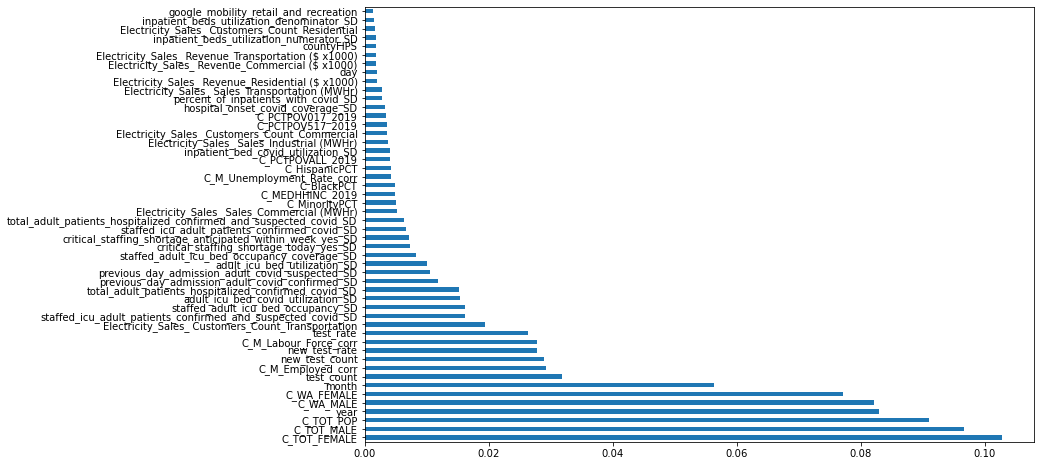

In [179]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

### As observed, we see that the accuracy score has increased by fair margin, by using the correlation technique.

## Forecasting

### We selected random forest as our final submission model

In [180]:
random_regressor_final= RandomForestRegressor(random_state=0)
random_regressor_final.fit(Xcopy,Ycopy)
Y_pred_rf_final= random_regressor_final.predict(dfcorr1)

<ipython-input-180-cb4bb3d13c09>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_regressor_final.fit(Xcopy,Ycopy)


In [182]:
Y1['Confirmed_cases']=Y_pred_rf_final

In [183]:
Y1.to_csv('DIVERGENT_180104058_180104076_IITGUWAHATI.csv')